# **Customer Churn Analysis**

### Table of Contents

* [Importing Required Libraries](#head1)
* [Loading Data](#head2)
* [Exploratory Data Analysis](#head3)
    * [City Wise Customers](#subhead1)
    * [No of Customers with their Churn Reason](#subhead2)
    * [Top 10 Cities where customer don't know their reason for churn](#subhead3)
    * [Top 5 cities where customers churn with their churn reason](#subhead4)
    * [Which internet service is best to prevent churn?](#subhead5)
    * [Which payment method is best to prevent churn?](#subhead6)
    * [Which Contract San Diego churned customers mostly use?](#subhead7)
    * [Customers contract who have no internet service?](#subhead8)
    * [Numerical Columns Distribution with Churn & No Churn](#subhead9)
    * [Which types of customers have high Customer Lifetime Value with respect to churn?](#subhead10)
    * [Correlation Analysis](#subhead11)

## **Importing Required Libraries** <a id="head1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data** <a id="head2"></a>

In [2]:
telecom_customer = pd.read_csv("/content/TelcoCustomerChurn.csv",index_col=0)

## **Exploratory Data Analysis** <a id="head3"></a>

**City Wise Customers** <a id="subhead1"></a>

In [3]:
def perc(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()


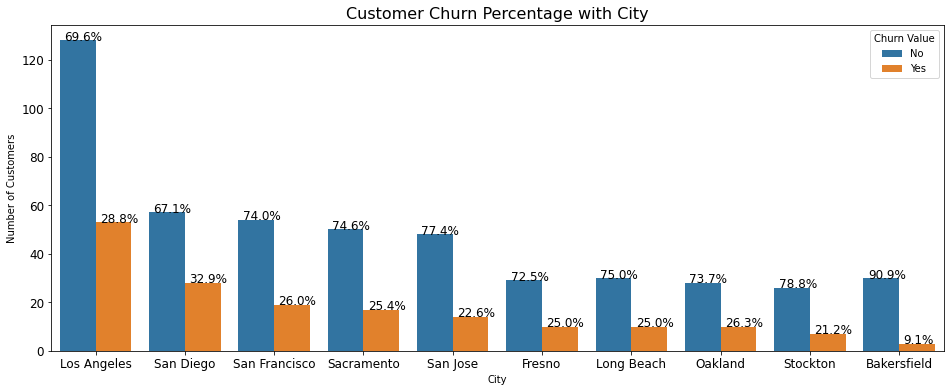

In [4]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x='City',data=telecom_customer,
                 order=telecom_customer['City'].value_counts().head(10).index,hue='Churn Value')
plt.ylabel('Number of Customers')
plt.xlabel('City')
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Customer Churn Percentage with City", size=16)
perc(ax,telecom_customer.City,10,2)


* San Diego has highest percentage of customer churn.
* Los Angeles has second highest percentage of customer churn.

**No of Customers with their Churn Reason** 
<a id="subhead2"></a>

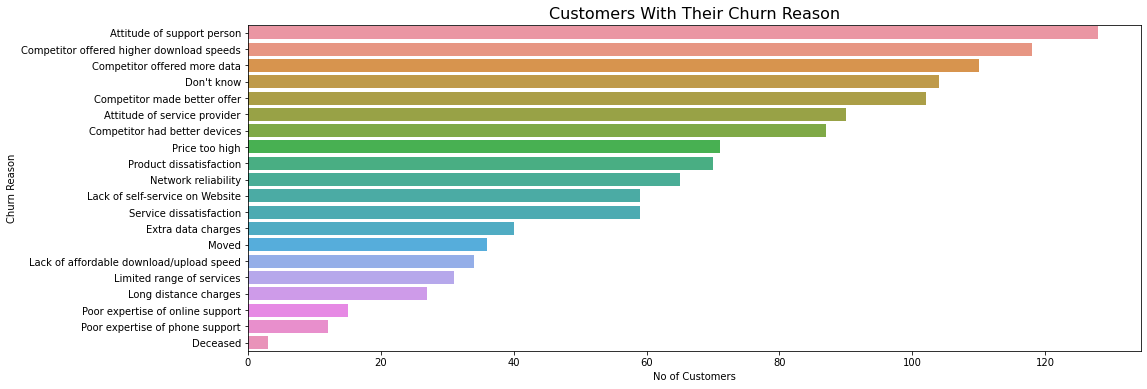

In [5]:
plt.figure(figsize=(16,6))
ax = sns.countplot(y='Churn Reason',
                   data=telecom_customer,
                   order=telecom_customer['Churn Reason'].value_counts().index)
plt.title("Customers With Their Churn Reason", size=16)
plt.xlabel('No of Customers')
plt.show()

Top reasons of churn:
* Attitude of support person
* Competitor offers higher download speeds

But Still there is large no of people who don't know their reason for churn

**Top 10 Cities where customer don't know their reason for churn.** <a id="subhead3"></a>

In [6]:
def percent(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    


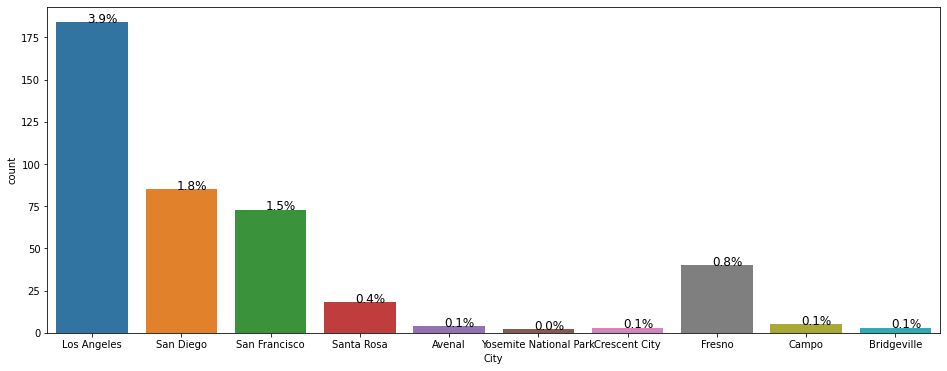

In [7]:


condition = telecom_customer.loc[(telecom_customer['Churn Reason']=="Don't know")]['City']
plt.figure(figsize=(16,6))
ax = sns.countplot(x='City',
                   data=telecom_customer,
                   order=condition.value_counts().sort_values(ascending=False)[0:10].index)
percent(ax, telecom_customer.City)

* 3.9% Los Angeles Customers don't know the reason for their churn.

**Top 5 cities where customers churn with their churn reason** <a id="subhead4"></a>

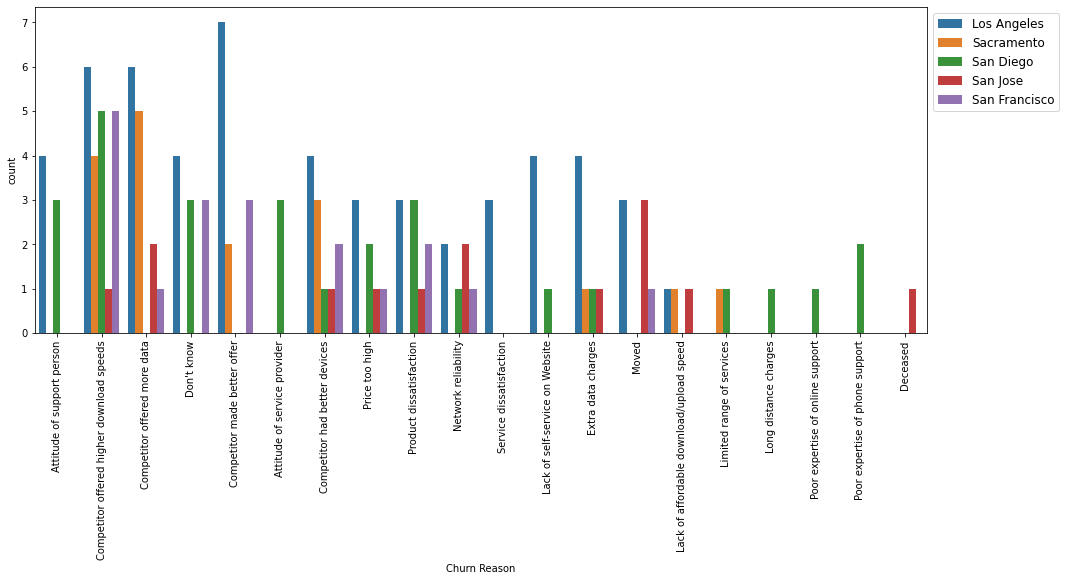

In [8]:
top_5_cities = telecom_customer.loc[(telecom_customer['Churn Value']=='Yes')]['City'].value_counts()[0:5].index.to_list()

telecom_customer['top_5_cities'] = telecom_customer[telecom_customer['City'].isin(top_5_cities)]['City']

condition = telecom_customer.loc[(telecom_customer['Churn Value']=='Yes')]['Churn Reason']
plt.figure(figsize=(16,6))
ax = sns.countplot(x='Churn Reason',
                   data=telecom_customer,
                   order=condition.value_counts().index,hue='top_5_cities')
ax.legend(bbox_to_anchor=(1, 1),prop={'size':12})
plt.xticks(rotation=90)
plt.show()

* In Los Angeles,most customers are churn as other competitor give better offer to them.
* In cities like San Francisco , San Diego and Sacramento , main factor of customers churn is competitor offered higher download speeds.
* In San Jose, main factor for customer churn is Moved.

**Which internet service is best to prevent churn?** <a id="subhead5"></a>

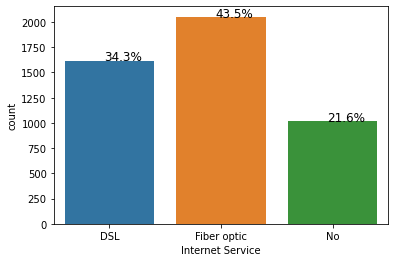

In [9]:
ax=sns.countplot(data=telecom_customer,x='Internet Service')
percent(ax, telecom_customer['Internet Service'])

* Most customers prefer fiber optic internet service 


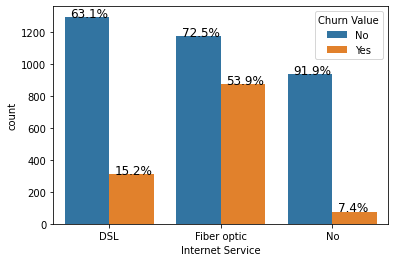

In [10]:
ax=sns.countplot(data=telecom_customer,x='Internet Service', hue='Churn Value')
perc(ax,telecom_customer['Internet Service'],3,2)

* Customers who use fiber optic are mostly churn.
* Customers who use no internet service are very less churn.

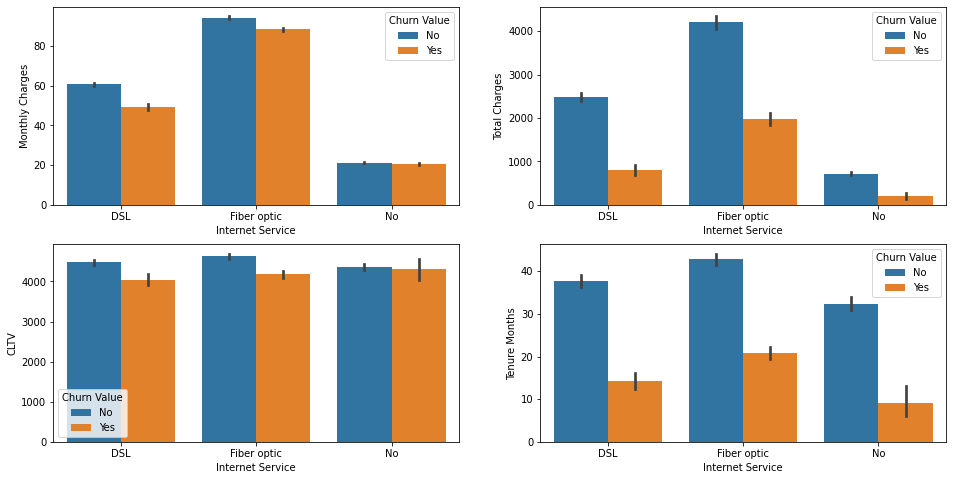

In [11]:
f, axes = plt.subplots(2, 2,figsize=(16,8))

sns.barplot(x='Internet Service', y='Monthly Charges', data=telecom_customer,
            hue='Churn Value',ax = axes[0,0])

sns.barplot(x='Internet Service', y='Total Charges', data=telecom_customer,
            hue='Churn Value',ax = axes[0,1])

sns.barplot(x='Internet Service', y='CLTV', data=telecom_customer,
            hue='Churn Value',ax = axes[1,0])

sns.barplot(x='Internet Service', y='Tenure Months', data=telecom_customer,
            hue='Churn Value',ax = axes[1,1])


* Customers with DSL internet service are less churn when monthly charges are increasing.
* Customers with no internet service are less churn when total charges are increasing and customers with DSL are moderately churn.
* Customers with no internet service are more churn when CLTV is increasing than customers with fiber optic and dsl internet service.
* Customers with no internet service are less churn as Tenure are increasing and customers with DSL are moderately churn.
* Company should encourage customers to use DSL internet service to prevent churn.


**Which payment method is best to prevent churn?** <a id="subhead6"></a>

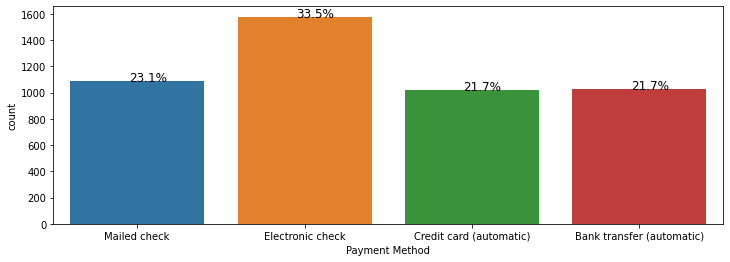

In [12]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=telecom_customer,x='Payment Method')
percent(ax, telecom_customer['Payment Method'])

* Most people prefer electonic check then Mailed Check.

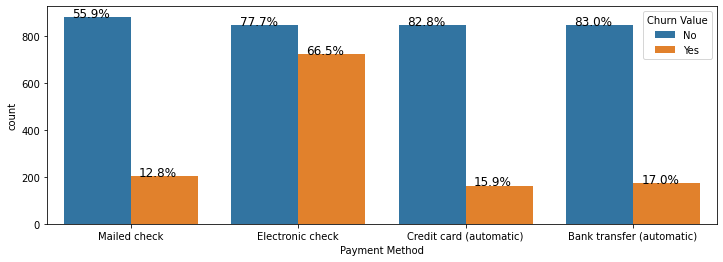

In [13]:
plt.figure(figsize=(12,4))
ax=sns.countplot(data=telecom_customer,x='Payment Method', hue='Churn Value')
perc(ax,telecom_customer['Payment Method'],4,2)

* Customer with electronic check are mostly churn.
* Customer with mailed check are very less churn.

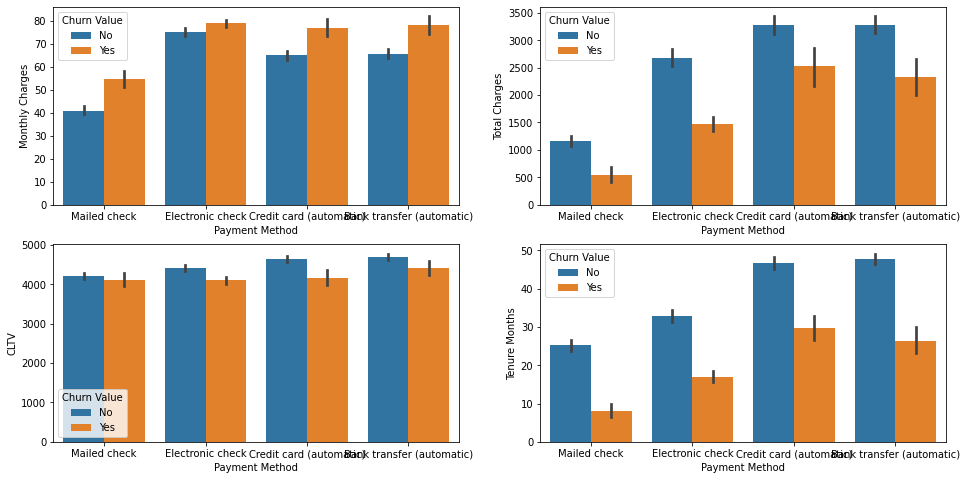

In [14]:
f, axes = plt.subplots(2, 2,figsize=(16,8))

sns.barplot(x='Payment Method', y='Monthly Charges', data=telecom_customer,
            hue='Churn Value',ax = axes[0,0])

sns.barplot(x='Payment Method', y='Total Charges', data=telecom_customer,
            hue='Churn Value',ax = axes[0,1])

sns.barplot(x='Payment Method', y='CLTV', data=telecom_customer,
            hue='Churn Value',ax = axes[1,0])

sns.barplot(x='Payment Method', y='Tenure Months', data=telecom_customer,
            hue='Churn Value',ax = axes[1,1])


* Customers who pay with electronic check are very less churn when monthly charges are increasing.
* Customers who pay either by electronic check or mailed check are less churn when total charges are increasing.
* Company should ecourage more use of mailed check to prevent churn.

**Which Contract San Diego churned customers mostly use?**  <a id="subhead7"></a>

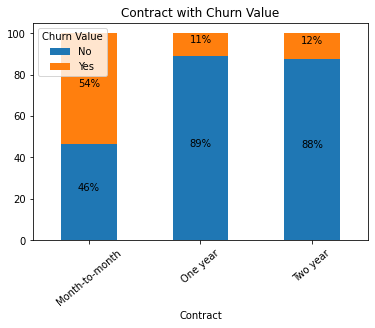

In [15]:
ax= pd.crosstab(telecom_customer[(telecom_customer['City']=='San Diego')]['Contract'], 
                                  telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
                                  
cw=ax.plot.bar(stacked=True, rot=0,title = 'Contract with Churn Value')
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Customers in San Diego who take One Year & Two year contract has very less churn rate.
* Customers chooses month-to-month contract are 54% churn.

**Customers contract who have no internet service?**
<a id="subhead8"></a>

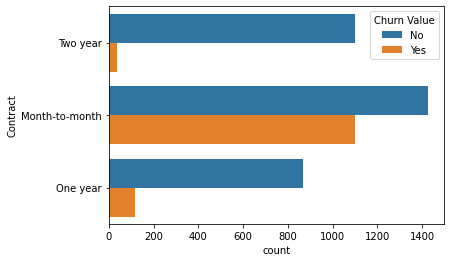

In [16]:
sns.countplot(y='Contract',
              data=telecom_customer,
              order=telecom_customer.loc[(telecom_customer['Internet Service']=='No')]['Contract'].value_counts().index,hue='Churn Value')
plt.show()


* Customer without internet service prefer month-to-month and 2 year contract.
* But Month-to-month Contract have highest churn value.

**Numerical Columns Distribution with Churn & No Churn** <a id="subhead9"></a>

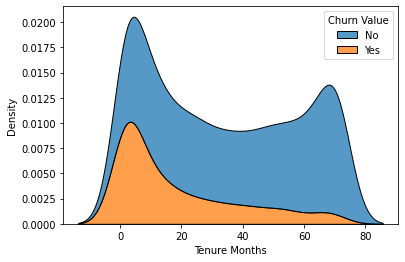

In [17]:
sns.kdeplot(data=telecom_customer, x="Tenure Months", hue="Churn Value", multiple="stack")

* Low Value of Tenure Months  lead to higher churn rate.

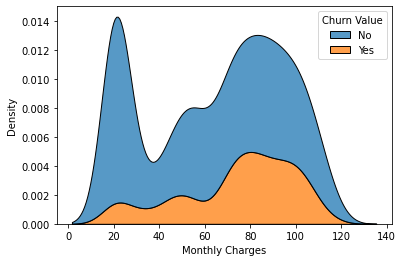

In [18]:
sns.kdeplot(data=telecom_customer, x="Monthly Charges", hue="Churn Value", multiple="stack")

* High Value of Monthly Charges lead to higher churn rate.

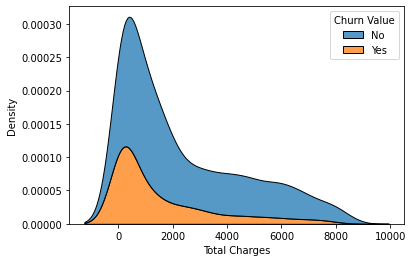

In [19]:
sns.kdeplot(data=telecom_customer, x="Total Charges", hue="Churn Value", multiple="stack")

* Low Value of Total Charges lead to higher churn rate.

**Which types of customers have high Customer Lifetime Value with respect to churn?** <a id="subhead10"></a>

In [20]:
mcltv=telecom_customer['CLTV'].mean()

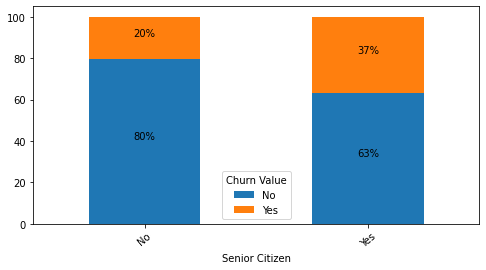

In [21]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv)]['Senior Citizen'],
                telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)
                
cw=ax.plot.bar(figsize=(8,4),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Senior Citizen are more churn with high CLTV value,so they are low profitable customers to the company.

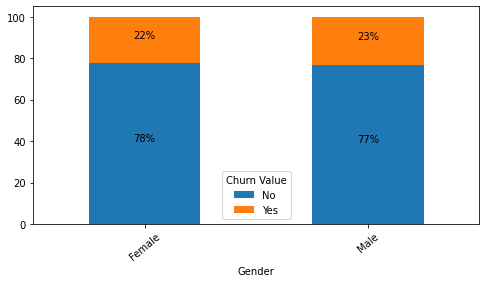

In [22]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv )]['Gender'], 
                telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)

cw=ax.plot.bar(figsize=(8,4),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Male and Female customers both have almost similar churn with high CLTV,so both are profitable to company.

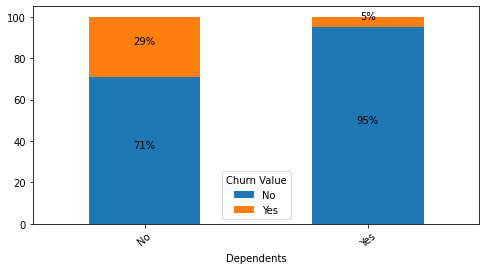

In [23]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv )]['Dependents'], 
                telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)

cw=ax.plot.bar(figsize=(8,4),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Customer with dependents have higher CLTV and less churn,so they are more profitable to the company.

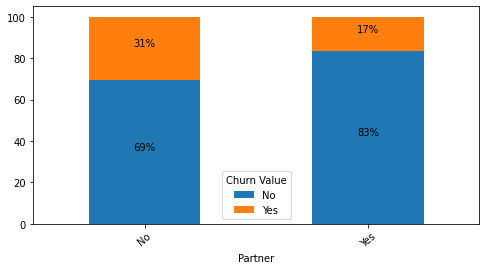

In [24]:
ax= pd.crosstab(telecom_customer[(telecom_customer['CLTV'] >mcltv )]['Partner'], 
                                   telecom_customer['Churn Value']).apply(lambda r: r/r.sum()*100, axis=1)

cw=ax.plot.bar(figsize=(8,4),stacked=True, rot=0)
plt.xticks(rotation=40)

for rec in cw.patches:
    height = rec.get_height()
    cw.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

* Customer with partner have higher CLTV and less churn ,so they are more profitable to the company.

**Correlation Analysis** <a id="subhead11"></a>


In [25]:
telecom_customer['Churn Value']=telecom_customer['Churn Value'].map({'No':0,'Yes':1})
mat=telecom_customer.drop(["Zip Code","Latitude","Longitude"],axis=1)
corr_mat = mat.corr()
corr_mat

,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn Value
Tenure Months,1.000000,0.249477,0.826230,0.399144,-0.351411
Monthly Charges,0.249477,1.000000,0.652260,0.108782,0.194242
Total Charges,0.826230,0.652260,1.000000,0.350800,-0.197336
CLTV,0.399144,0.108782,0.350800,1.000000,-0.128944
Churn Value,-0.351411,0.194242,-0.197336,-0.128944,1.000000


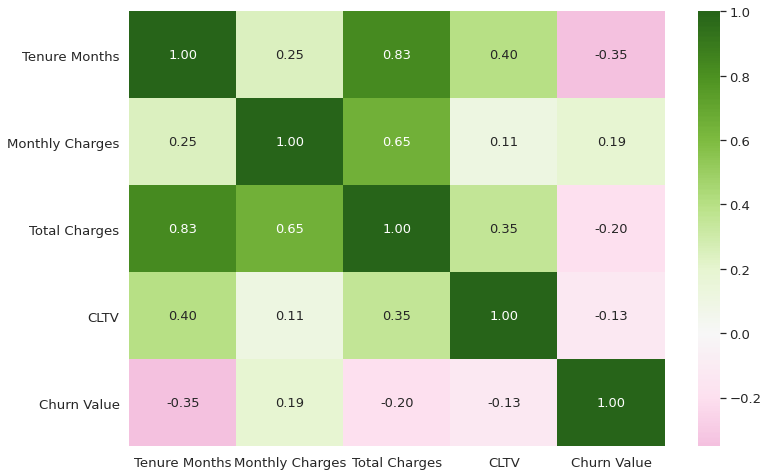

In [26]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0)

* Tenure Months is highly correlated with total charges.
* Monthly Charges is highly correlated with total charges.
* Monthly Charges is less positively correlated with churn value.
* CLTV is moderately correlated with Tenure Months and Total Charges.

